# Apple's Product Placements in Movies and TV shows - Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placements.csv')

 # Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         4692 non-null   object 
 1   Title          4692 non-null   object 
 2   Movie          4692 non-null   int64  
 3   Show           4692 non-null   int64  
 4   Season         3956 non-null   float64
 5   Episode        3956 non-null   float64
 6   imgCount       4692 non-null   int64  
 7   iPhone         4692 non-null   int64  
 8   iPad           4692 non-null   int64  
 9   iMac           4692 non-null   int64  
 10  MacBook        4692 non-null   int64  
 11  macOS          4692 non-null   int64  
 12  AirPods        4692 non-null   int64  
 13  Apple Watch    4692 non-null   int64  
 14  Page           4692 non-null   int64  
 15  averageRating  4692 non-null   float64
 16  numVotes       4692 non-null   int64  
 17  startYear      4692 non-null   int64  
dtypes: float

In [4]:
# convert float columns to int 
df['Season'] = pd.to_numeric(df['Season'],errors='coerce')
df['Episode'] = pd.to_numeric(df['Episode'],errors='coerce')

## the rows in the columns "Episode" and "Season" that contain null data are movies, so let's fill in those empty fields

In [5]:
df[['Episode','Season']] = df[['Episode','Season']].fillna('Movie')

In [6]:
#Remove columns that will not be used for the analysis

cols = ['tconst', 'Page']

df = df.drop(cols,axis=1)

In [7]:
df.isnull().sum()

Title            0
Movie            0
Show             0
Season           0
Episode          0
imgCount         0
iPhone           0
iPad             0
iMac             0
MacBook          0
macOS            0
AirPods          0
Apple Watch      0
averageRating    0
numVotes         0
startYear        0
dtype: int64

# Questions to answer about dataset:

## 1- What are the most frequently featured Apple products in movies and TV shows?

## 2- Is there a clear trend in the presence of Apple products over the years? Has it increased or decreased over time?

## 3- What is the proportion of movies versus TV shows in the dataset and how is the presence of Apple products distributed between the two?

## 4- What is the relationship between the average IMDb rating and the presence of Apple products? Do movies or TV shows with Apple products tend to have higher or lower ratings?

## 5- Is there a significant correlation between the number of votes received by a movie or series and its average rating on IMDb?

 _______________________________________________________________________________________________________________________________
 
# Analysis

## 1- What are the most frequently featured Apple products in movies and TV shows?

In [8]:
total_iphone = df['iPhone'].sum()
total_ipad = df['iPad'].sum()
total_imac = df['iMac'].sum()
total_macbook = df['MacBook'].sum()
total_macos = df['macOS'].sum()
total_airpods = df['AirPods'].sum()
total_apple_watch = df['Apple Watch'].sum()


products = ['iPhone', 'iPad', 'iMac', 'MacBook', 'macOS', 'AirPods', 'Apple Watch']


totals = {p: 0 for p in products}


for index, row in df.iterrows():
    for p in products:
        totals[p] += row[p] * row['imgCount']


for p, total in totals.items():
    print(f'{p}: {total}')

iPhone: 3389
iPad: 884
iMac: 1882
MacBook: 6492
macOS: 43
AirPods: 77
Apple Watch: 498


In [9]:
df_totals = pd.DataFrame(list(totals.items()), columns=['Product', 'Total'])
df_totals = df_totals.sort_values('Total',ascending=False)

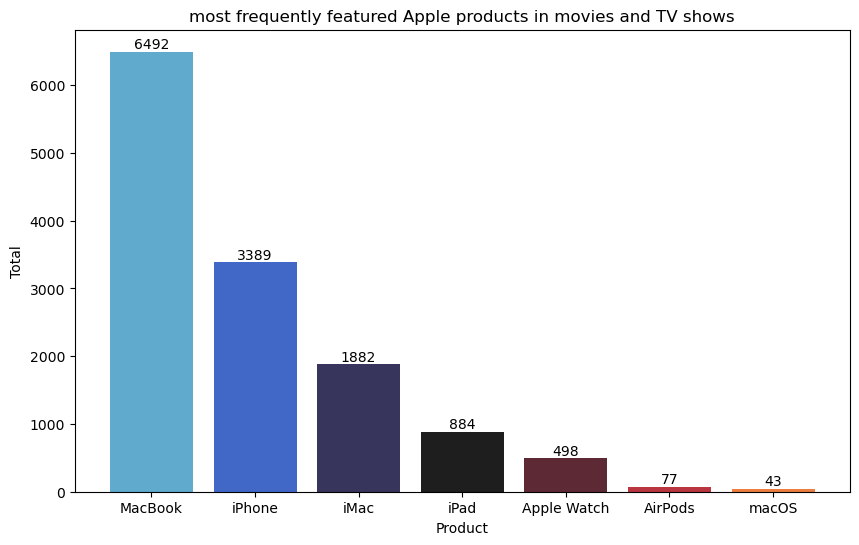

In [10]:
colors = sns.color_palette('icefire',len(df_totals['Product']))
plt.figure(figsize=(10,6))
bars = plt.bar(df_totals['Product'],df_totals['Total'],color=colors)
plt.xlabel('Product')
plt.ylabel('Total')
plt.title('most frequently featured Apple products in movies and TV shows')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

# 2-  Is there a clear trend in the presence of Apple products over the years? Has it increased or decreased over time?

In [11]:
df['Total_Products'] = df[products].multiply(df['imgCount'], axis=0).sum(axis=1)

In [12]:
df_years = df.groupby('startYear')['Total_Products'].sum().reset_index()

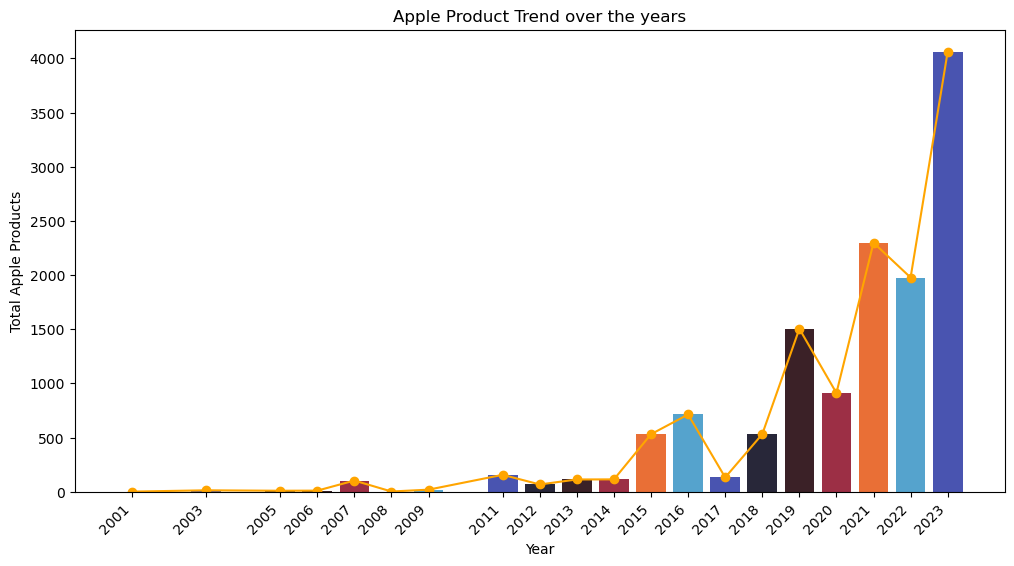

In [13]:
plt.figure(figsize=(12, 6))

colors = sns.color_palette('icefire')

bars = plt.bar(x=df_years['startYear'], height=df_years['Total_Products'], color=colors, label='Total Apple Products')

line = plt.plot(df_years['startYear'], df_years['Total_Products'], color='orange', marker='o', label='Trendline')

plt.xticks(df_years['startYear'], rotation=45, ha='right')

plt.xlabel('Year')
plt.ylabel('Total Apple Products')
plt.title('Apple Product Trend over the years')



plt.show()

## The following graph shows that the trend of Apple products increased considerably, even more in the last year, doubling the appearance of these products compared to the previous year.

# 3- What is the proportion of movies versus TV shows in the dataset and how is the presence of Apple products distributed between the two?

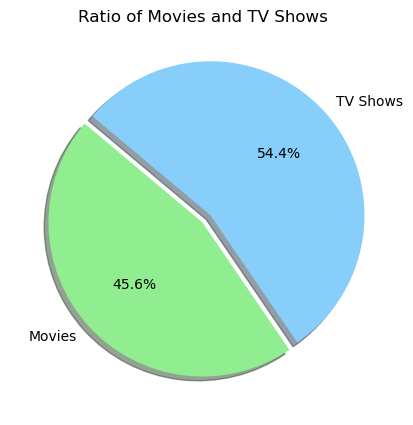

In [14]:
df_count = df.groupby('Title')[['Movie', 'Show']].max()
total_movies = df_count['Movie'].sum()
total_shows = df_count['Show'].sum()

labels = ['Movies', 'TV Shows']
sizes = [total_movies, total_shows]
colors = ['lightgreen', 'lightskyblue']
explode = (0, 0.07)

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Ratio of Movies and TV Shows')
plt.show()

In [15]:
df_apple_type = df.groupby(['Title', 'Show']).agg({'Total_Products': 'sum'}).reset_index()

In [16]:
total_shows_p = df_apple_type[df_apple_type['Show'] == 1]['Total_Products'].sum()
total_movies_p = df_apple_type[df_apple_type['Show'] == 0]['Total_Products'].sum()

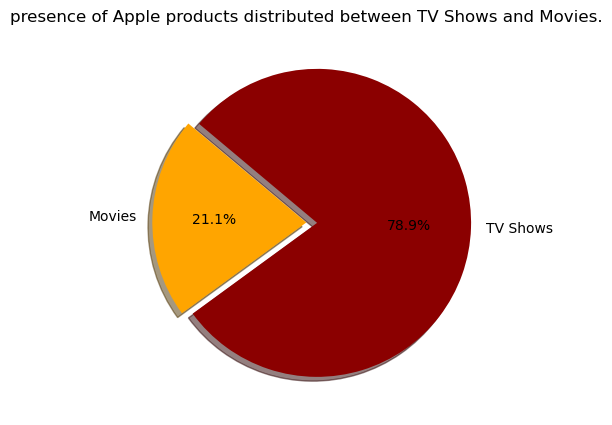

In [17]:
labels = ['Movies', 'TV Shows']
sizes = [total_movies_p, total_shows_p]
colors = ['orange', 'darkred']
explode = (0, 0.07)

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('presence of Apple products distributed between TV Shows and Movies.')
plt.show()

### Although the number of TV shows is similar to the number of movies in the dataset, the first has a higher number of appearances of Apple products, which is likely due to the amount of content a show has compared to a movie.

# 4 - What is the relationship between the average IMDb rating and the presence of Apple products? Do movies or TV shows with Apple products tend to have higher or lower ratings?

In [18]:
df_avg = df.groupby(['Title','averageRating']).agg({'Total_Products': 'sum'}).reset_index()

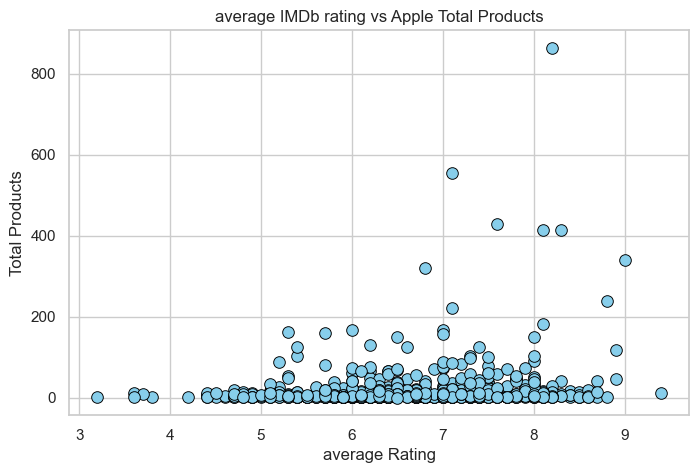

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='averageRating', y='Total_Products', data=df_avg, color='skyblue', edgecolor='black', s=70)

plt.title('average IMDb rating vs Apple Total Products')
plt.xlabel('average Rating')
plt.ylabel('Total Products')

plt.show()

## The graph shows that there is no correlation between the number of products shown and the average rating of the shows and movies, although some outlayers are displayed, there are also shows with high ratings and low number of Apple products.

## We can conclude that the appearance of Apple products in TV shows and movies is not something that changes their IMDb rating.

#  5-  Is there a significant correlation between the number of votes received by a movie or series and its average rating on IMDb?

In [20]:
cols_imdb = ['Title', 'averageRating', 'numVotes']

In [21]:
df_rating =  df[cols_imdb].groupby('Title').agg({'averageRating': 'mean', 'numVotes': 'mean'}).reset_index()

df_rating['numVotes'] = df_rating['numVotes'].astype(int)

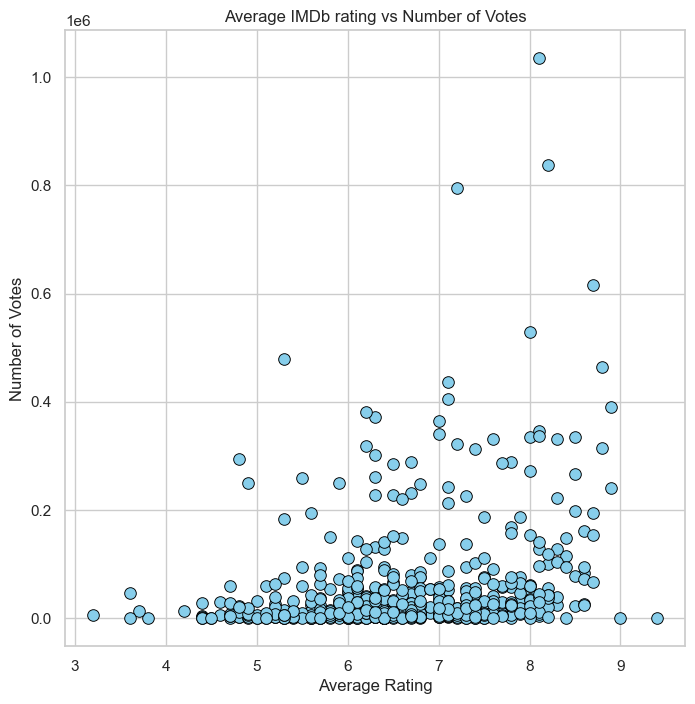

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 8))
sns.scatterplot(x='averageRating', y='numVotes', data=df_rating, color='skyblue', edgecolor='black', s=70)

plt.title('Average IMDb rating vs Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')

plt.show()

### although some shows and movies have a high number of votes and a good score, they are few in relation to the rest of the data, since for the most part, both TV shows and movies have a similar number of votes and are evenly distributed in the IMDb rating.